In [619]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
sns.set(color_codes = True)
sns.set(font_scale=1.5) # fixe la taille de la police à 1.5 * 12pt

In [620]:
mass = pd.read_csv("/Users/martinbordeau/Downloads/masstableDUZU2.csv", sep=";")

In [621]:
#mass2 = mass.assign(S2p=0) 
#mass3 = mass2.assign(S2n=0)
#mass3.drop(mass3[(mass3["Z"]<15 )].index, inplace=True)

In [622]:
mass['A'] = mass['Z'] + mass['N']
mass['BE'] = mass['BE/A'] * mass['A']
mass.sort_values(by='A', ascending=True)


,Z,N,BE/A,MassExcess,A,BE
0,0,1,311.628937,-303.557556,1,311.628937
180,1,0,311.628937,-304.339905,1,311.628937
361,2,0,26.706369,-38.834679,2,53.412739
1,0,2,27.002100,-37.861443,2,54.004200
181,1,1,1.922539,11.515332,2,3.845078
...,...,...,...,...,...,...
21717,119,179,7.069761,205.382812,298,2106.788861
21537,118,180,7.091915,199.563232,298,2113.390566
21718,119,180,7.070853,206.057861,299,2114.185116
21898,120,179,7.052330,210.813965,299,2108.646532


In [623]:
#NoCountry = mass[mass['A'] == 21]
#NoCountry.head(n=25)

### Calcul de S1n et S1p

In [624]:
mass.sort_values(by=['Z'], ascending=True)
mass['S1n'] = mass['BE'] - mass['BE'].shift(1)

In [625]:
mass=mass.sort_values(by=['N','A'], ascending=True)

In [626]:
mass['S1p'] = mass['BE'] - mass['BE'].shift(1)

### Calcul de S2n et S2p

In [627]:
#mass.sort_values(by='N', ascending=True)
mass['S2p'] = mass['BE'] - mass['BE'].shift(2)


In [628]:
mass=mass.sort_values(by=['Z','A'], ascending=True)
mass['S2n'] = mass['BE'] - mass['BE'].shift(2)

### Plots

In [629]:
mass.drop(mass[(mass["A"]<16 )].index, inplace=True)
mass.drop(mass[(mass["BE/A"]<0 )].index, inplace=True)
#mass.drop(mass[(mass["MassExcess"]<0 )].index, inplace=True)
#mass.drop(mass[(mass["S1p"]>20 )].index, inplace=True)
#mass.drop(mass[(mass["S1n"]>20 )].index, inplace=True)

#mass.drop(mass[(mass["S2n"]>20 )].index, inplace=True)
mass.drop(mass[(mass["S2n"]<0 )].index, inplace=True)

#mass.drop(mass[(mass["S2p"]>36 )].index, inplace=True)
mass.drop(mass[(mass["S2p"]<0 )].index, inplace=True)

mass.drop(mass[(mass["S1p"]<0 )].index, inplace=True)
mass.drop(mass[(mass["S1n"]<0 )].index, inplace=True)

#mass.drop(mass[(mass["Z"]==15 )].index, inplace=True)

In [630]:
mass=mass.sort_values(by='A', ascending=True)
mass.head(20)

,Z,N,BE/A,MassExcess,A,BE,S1n,S1p,S2p,S2n
1095,6,10,6.898167,14.077316,16,110.370667,4.507875,23.188839,42.117482,5.902274
1275,7,9,7.419595,4.952110,16,118.713516,3.493556,12.850725,33.437960,13.427935
1455,8,8,7.993990,-5.020561,16,127.903839,16.131404,12.683879,23.435447,29.960029
1816,10,7,6.661270,16.148369,17,113.241584,17.656890,1.831916,1.469149,43.782992
916,5,12,5.179702,45.246765,17,88.054931,1.097350,21.801620,49.412617,0.873103
1636,9,8,7.587443,1.185776,17,128.986529,17.576861,1.082690,13.766569,33.561636
1096,6,11,6.508854,21.868843,17,110.650516,0.279850,23.692936,44.979583,4.787725
1456,8,9,7.812744,-1.862000,17,132.816650,4.912811,14.103134,26.953859,21.044216
1276,7,10,7.341997,6.923058,17,124.813943,6.100427,14.443277,37.632115,9.593983
1637,9,9,7.753909,-1.326675,18,139.570355,10.583827,6.753705,20.856839,28.160687


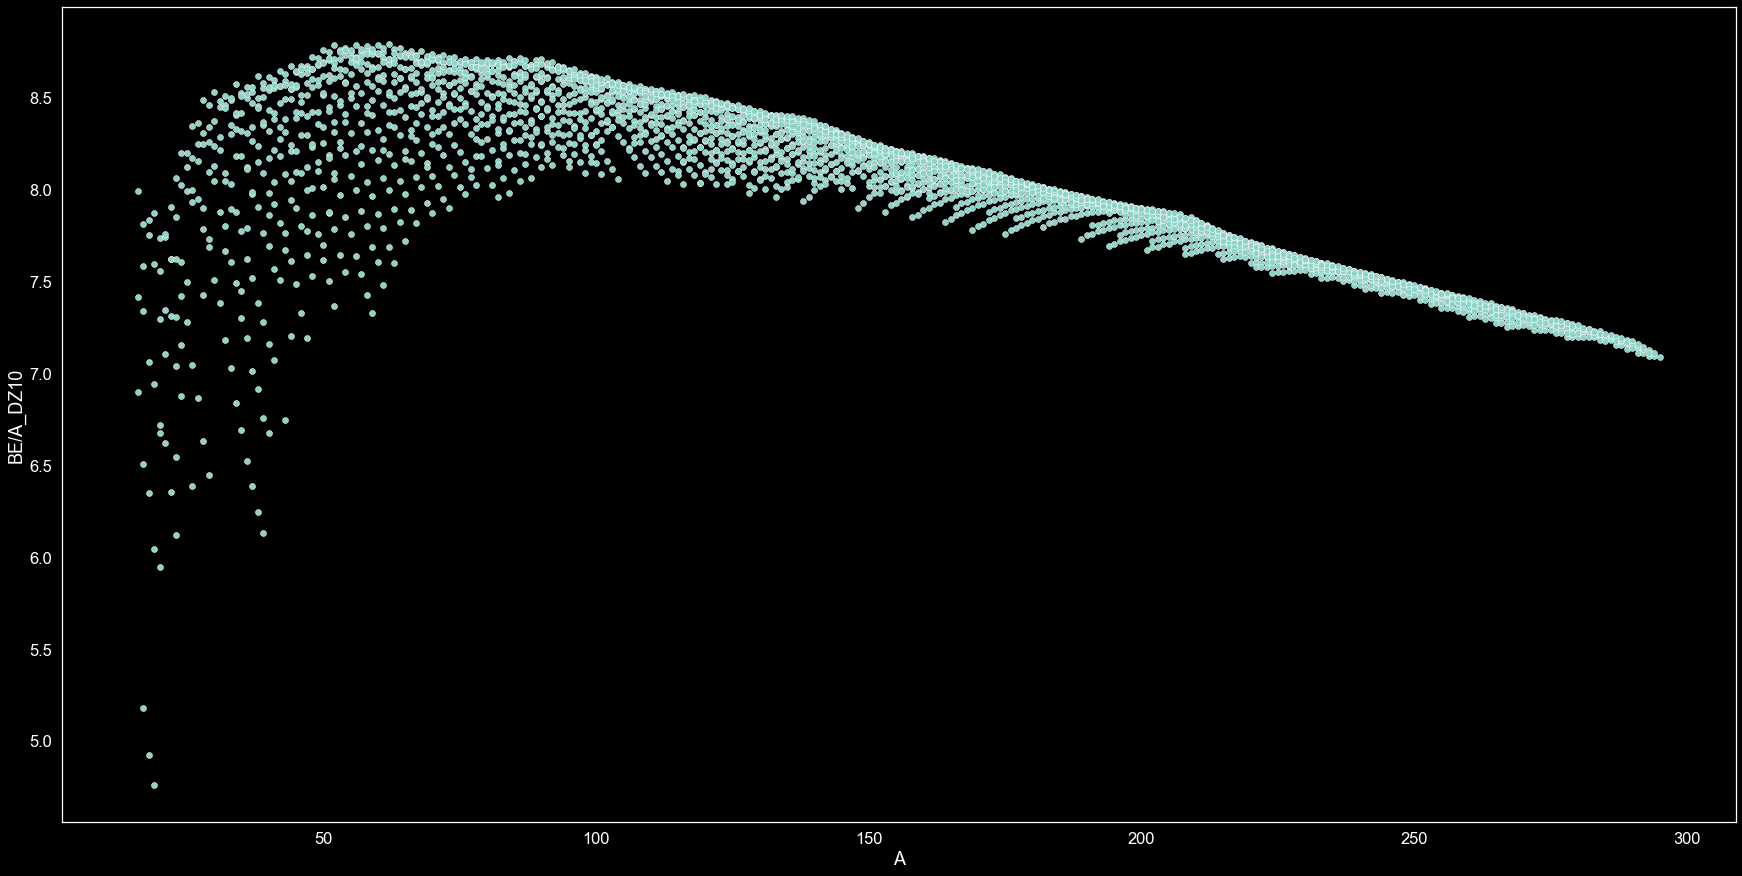

In [631]:
with plt.style.context('dark_background'):
    plt.figure(figsize =(30,15))
    plt.grid()
    sns.scatterplot( x='A',y='BE/A_DZ10', data=df3, palette="rainbow_r")

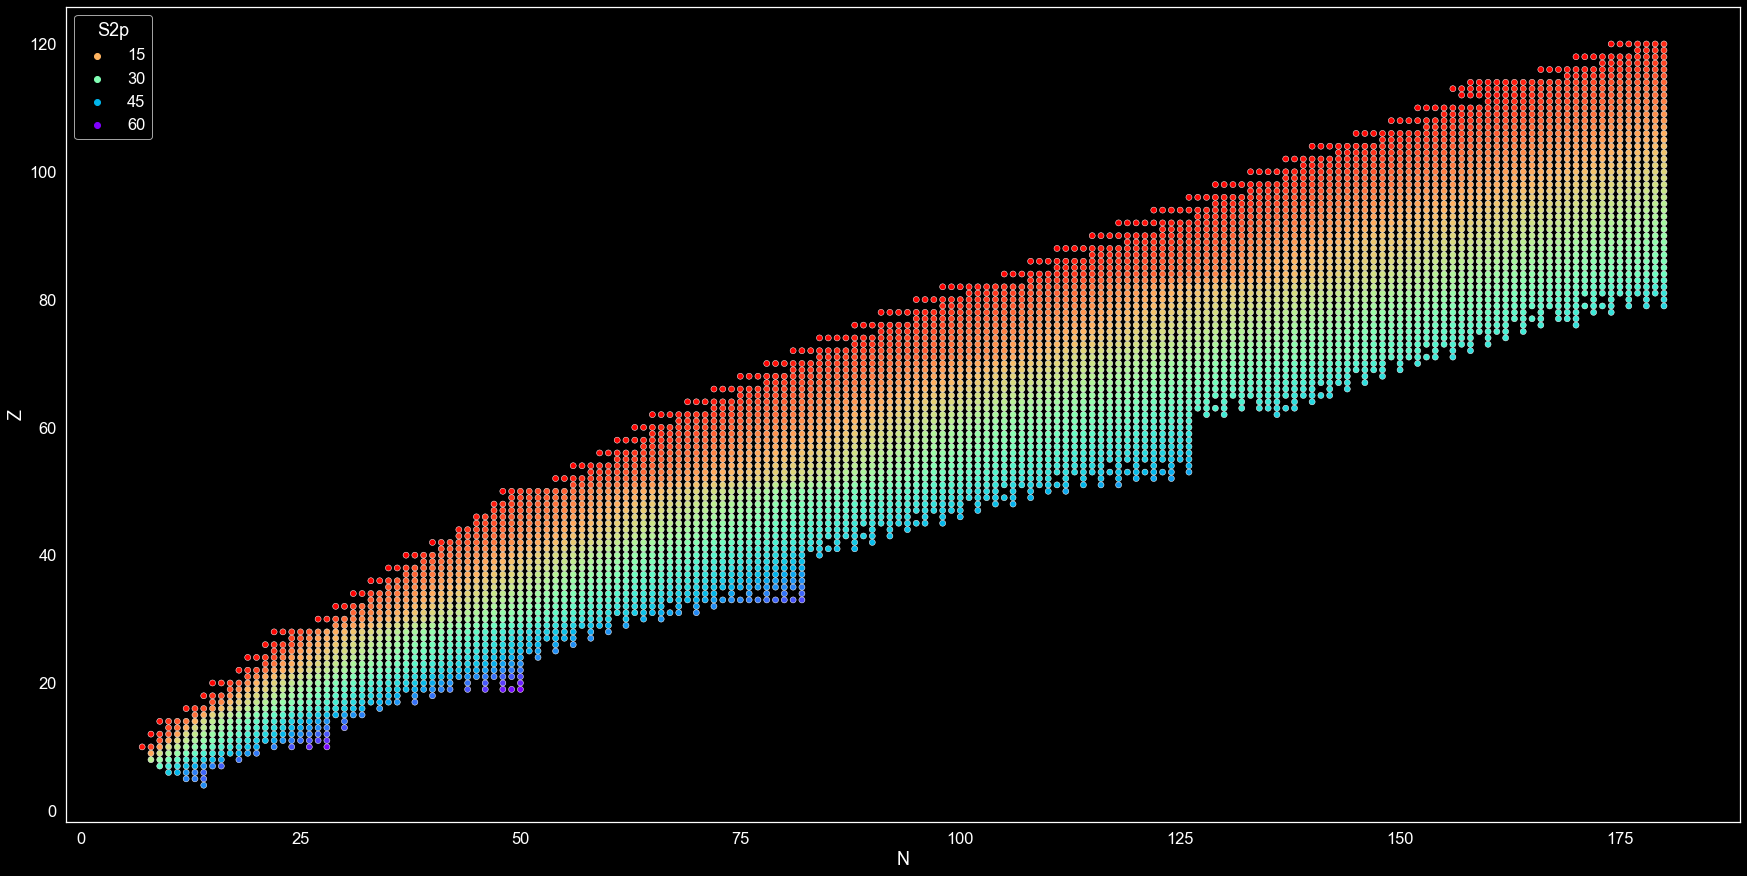

In [632]:
with plt.style.context('dark_background'):
    plt.figure(figsize =(30,15))
    plt.autoscale()
    plt.grid()
    sns.scatterplot(x='N', y='Z', hue='S2p', data=mass, palette="rainbow_r")

In [603]:
#mass.to_csv('duzutable.csv', index=False)

In [634]:
mass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5457 entries, 1095 to 21899
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Z           5457 non-null   int64  
 1   N           5457 non-null   int64  
 2   BE/A        5457 non-null   float64
 3   MassExcess  5457 non-null   float64
 4   A           5457 non-null   int64  
 5   BE          5457 non-null   float64
 6   S1n         5457 non-null   float64
 7   S1p         5457 non-null   float64
 8   S2p         5457 non-null   float64
 9   S2n         5457 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 469.0 KB


In [635]:
mass.head()

,Z,N,BE/A,MassExcess,A,BE,S1n,S1p,S2p,S2n
1095,6,10,6.898167,14.077316,16,110.370667,4.507875,23.188839,42.117482,5.902274
1275,7,9,7.419595,4.952110,16,118.713516,3.493556,12.850725,33.437960,13.427935
1455,8,8,7.993990,-5.020561,16,127.903839,16.131404,12.683879,23.435447,29.960029
1816,10,7,6.661270,16.148369,17,113.241584,17.656890,1.831916,1.469149,43.782992
916,5,12,5.179702,45.246765,17,88.054931,1.097350,21.801620,49.412617,0.873103


In [636]:
AME = pd.read_csv("/Users/martinbordeau/Downloads/train_data.csv", sep=";")


In [637]:
df3=pd.merge(mass, AME, on=["Z", "N", "A"])

In [638]:
df3.head()

,Z,N,BE/A_x,MassExcess,A,BE,S1n,S1p,S2p,S2n,N-Z,Mass_excess,ME_unc,BE/A_y,BE/A_unc,Beta_decay_Energy,BDE_unc,Atomic_Mass,AM_unc
0,6,10,6.898167,14.077316,16,110.370667,4.507875,23.188839,42.117482,5.902274,4,13694.13300,3.5780,6922.0546,0.2236,8010.2260,4.2540,16.014701,3.84000
1,7,9,7.419595,4.952110,16,118.713516,3.493556,12.850725,33.437960,13.427935,2,5683.90700,2.3010,7373.7971,0.1438,10420.9094,2.3014,16.006102,2.47000
2,8,8,7.993990,-5.020561,16,127.903839,16.131404,12.683879,23.435447,29.960029,0,-4737.00217,0.0003,7976.2072,0.0002,-15412.1840,5.3642,15.994915,0.00032
3,5,12,5.179702,45.246765,17,88.054931,1.097350,21.801620,49.412617,0.873103,7,43716.32200,204.1040,5269.6677,12.0061,22684.4422,204.8410,17.046931,219.11400
4,9,8,7.587443,1.185776,17,128.986529,17.576861,1.082690,13.766569,33.561636,-1,1951.70100,0.2480,7542.3284,0.0146,-14548.7507,0.4323,17.002095,0.26600


In [639]:
df3['BE/A_y']=df3['BE/A_y']/1000
df3['Mass_excess']=df3['Mass_excess']/1000
df3['diff']=df3['BE/A_x']-df3['BE/A_y']

<AxesSubplot:xlabel='A', ylabel='BE/A(exp) - BE/A(DZ10)'>

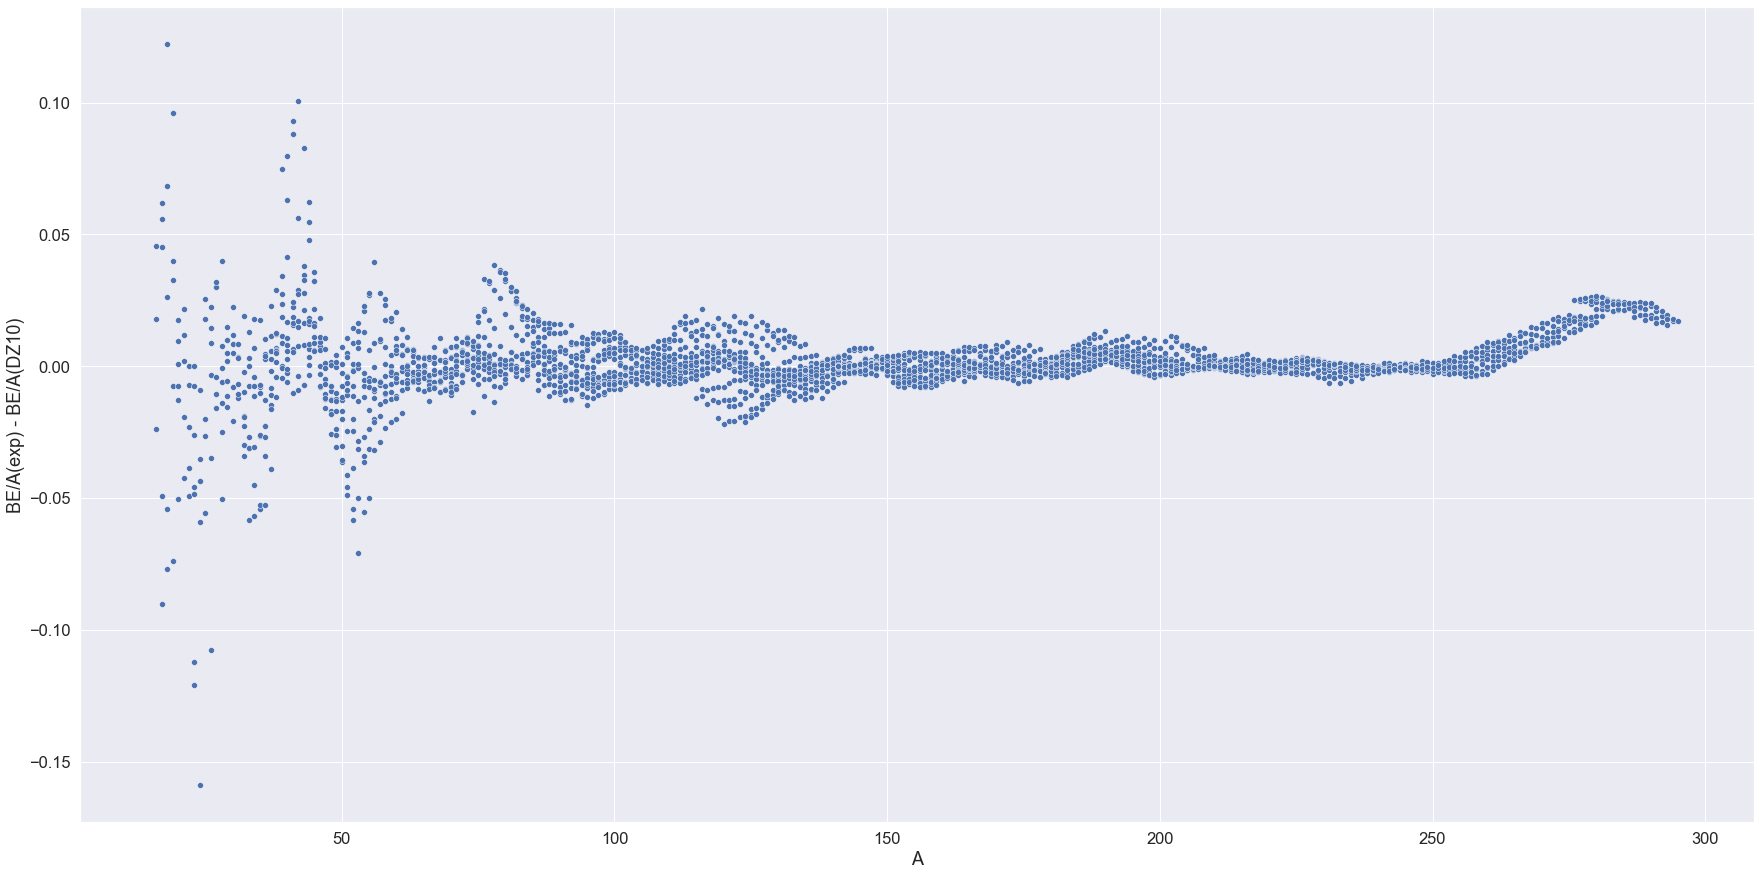

In [640]:

plt.figure(figsize =(30,15))
#plt.yscale('log')
plt.ylabel('BE/A(exp) - BE/A(DZ10)')
sns.scatterplot( x='A',y='diff', data=df3, palette="rainbow_r")

In [611]:
df3=df3.drop(['N-Z','ME_unc','BE/A_unc','Beta_decay_Energy','BDE_unc','AM_unc'], axis=1)

df3=df3.rename(columns={'BE/A_x': 'BE/A_DZ10'})
df3=df3.rename(columns={'BE/A_y': 'BE/A_AME'})
df3=df3.rename(columns={'MassExcess': 'MassExcess_DZ10'})
df3=df3.rename(columns={'Mass_excess': 'MassExcess_AME'})

In [618]:
rms_DZ10 = np.sqrt(((df3['diff'] ** 2).sum()) / len(df3['diff']))

print('RMS for DZ10:', rms_DZ10)


RMS for DZ10: 0.012772930249309094


In [613]:
df3.head()

,Z,N,BE/A_DZ10,MassExcess_DZ10,A,BE,S1n,S1p,S2p,S2n,MassExcess_AME,BE/A_AME,Atomic_Mass,diff
0,6,10,6.898167,14.077316,16,110.370667,4.507875,23.188839,42.117482,5.902274,13.694133,6.922055,16.014701,-0.023888
1,7,9,7.419595,4.952110,16,118.713516,3.493556,12.850725,33.437960,13.427935,5.683907,7.373797,16.006102,0.045798
2,8,8,7.993990,-5.020561,16,127.903839,16.131404,12.683879,23.435447,29.960029,-4.737002,7.976207,15.994915,0.017783
3,5,12,5.179702,45.246765,17,88.054931,1.097350,21.801620,49.412617,0.873103,43.716322,5.269668,17.046931,-0.089966
4,9,8,7.587443,1.185776,17,128.986529,17.576861,1.082690,13.766569,33.561636,1.951701,7.542328,17.002095,0.045114


<AxesSubplot:xlabel='A', ylabel='BE/A_DZ10'>

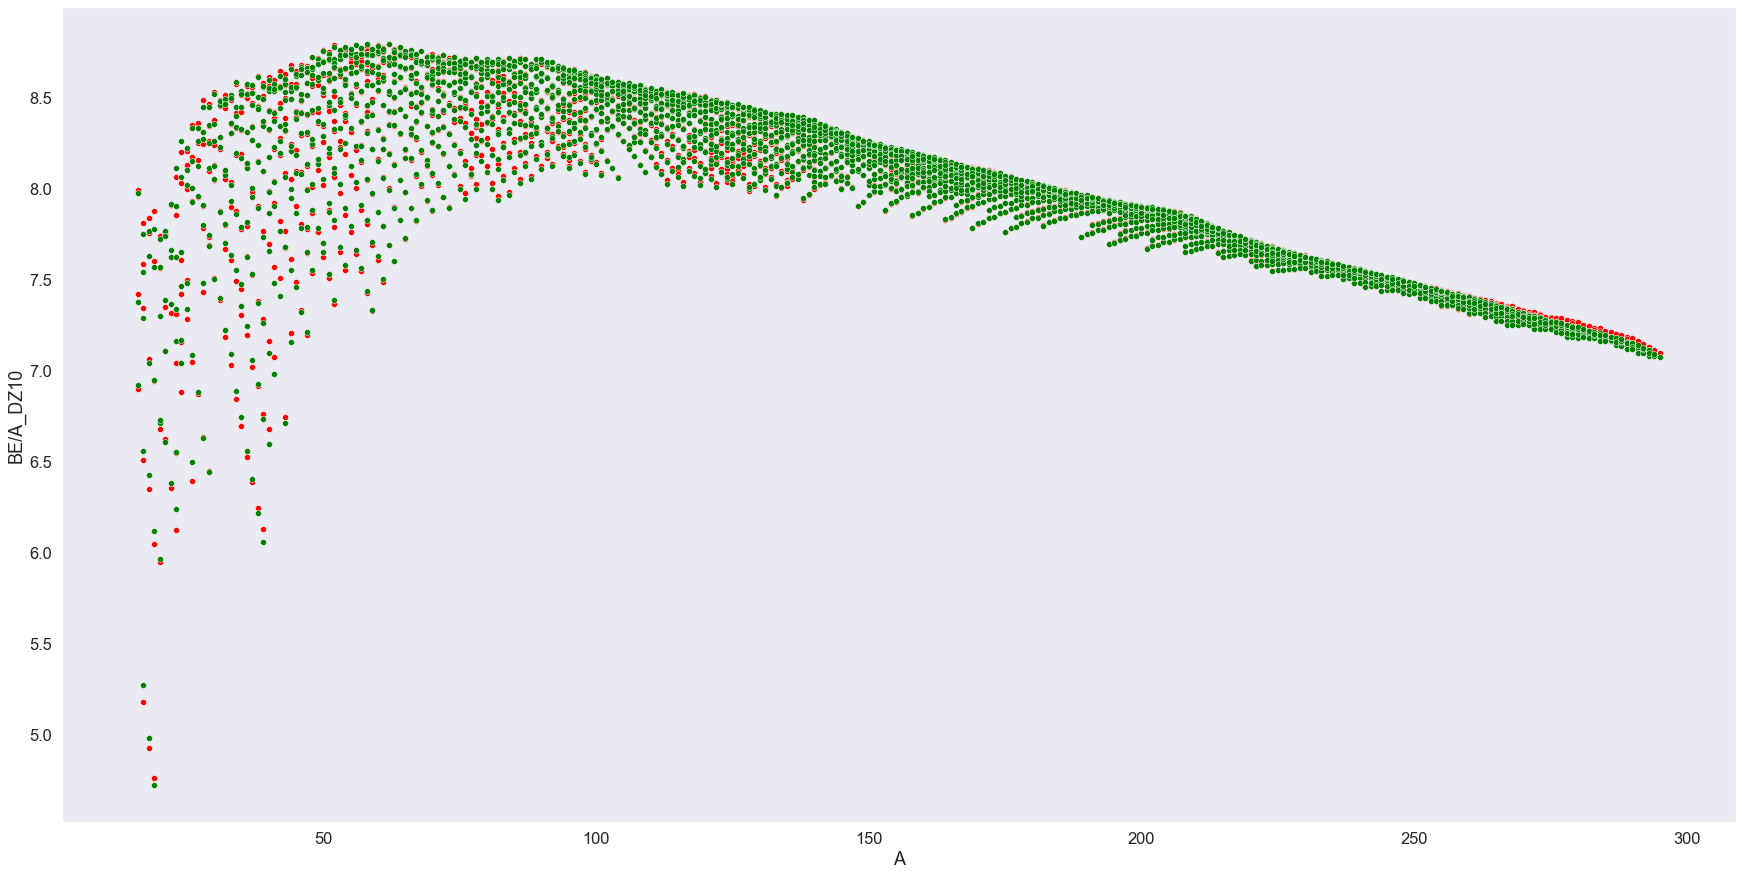

In [614]:
plt.figure(figsize =(30,15))
#plt.autoscale()
plt.grid()
sns.scatterplot(x='A', y='BE/A_DZ10', data=df3, palette="deep", color="red")
sns.scatterplot(x='A', y='BE/A_AME', data=df3, palette="deep",  color="green")

<AxesSubplot:xlabel='N', ylabel='Z'>

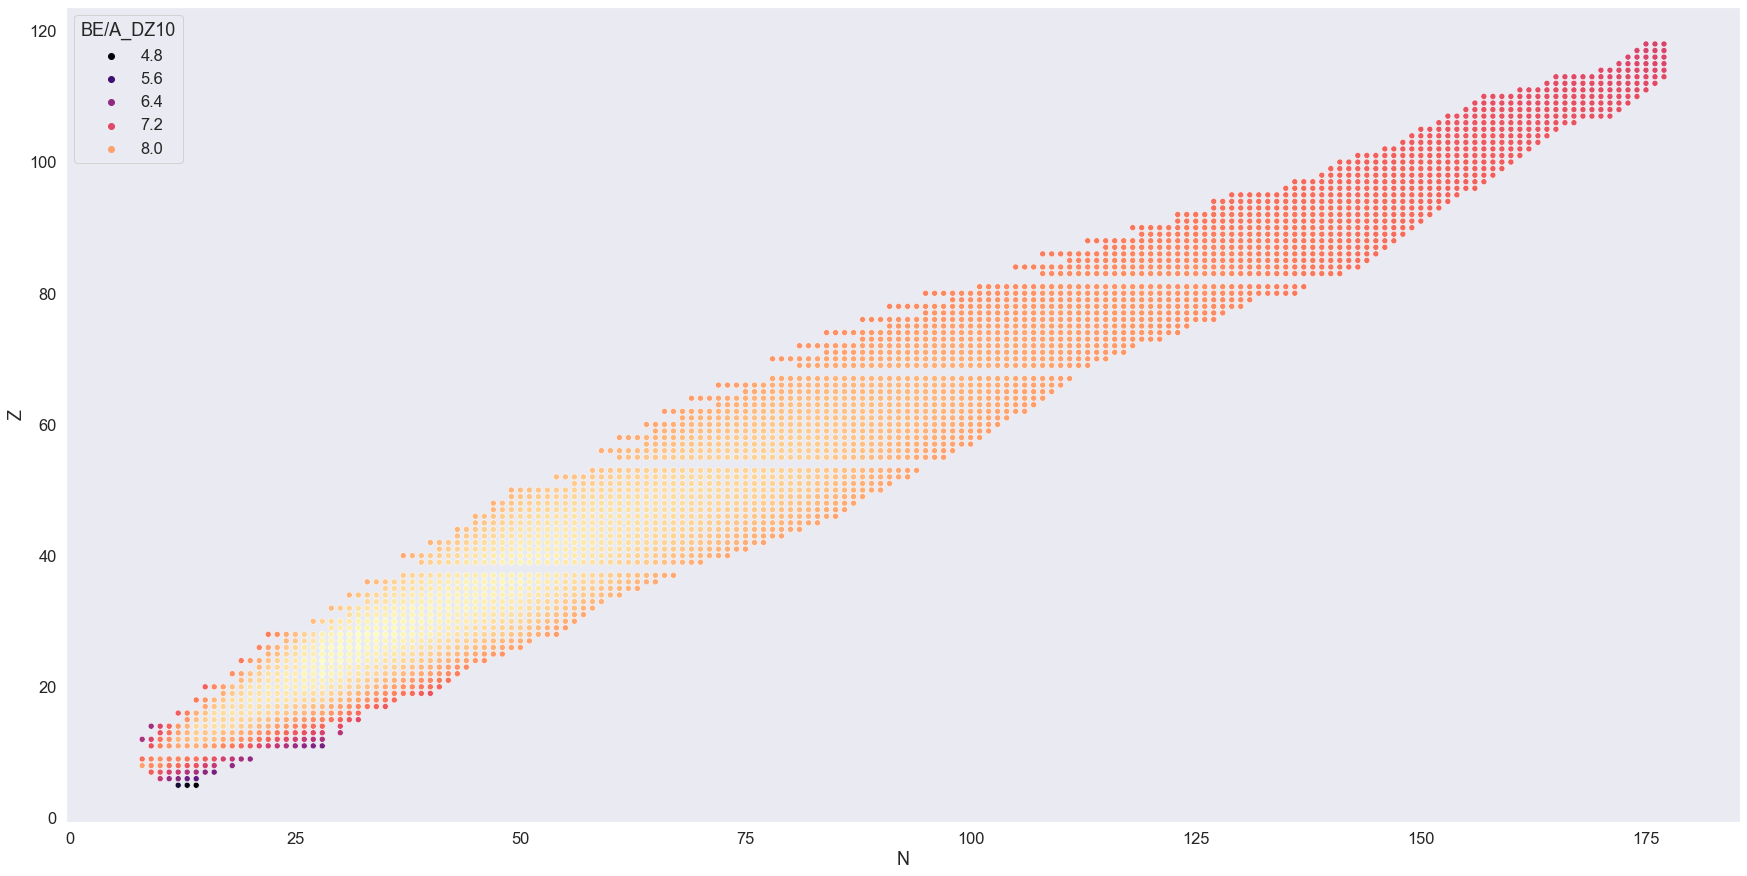

In [615]:

plt.figure(figsize =(30,15))
#plt.autoscale()
plt.grid()
sns.scatterplot(x='N', y='Z', hue='BE/A_DZ10',data=df3, palette="magma")

In [616]:
df3.head()

,Z,N,BE/A_DZ10,MassExcess_DZ10,A,BE,S1n,S1p,S2p,S2n,MassExcess_AME,BE/A_AME,Atomic_Mass,diff
0,6,10,6.898167,14.077316,16,110.370667,4.507875,23.188839,42.117482,5.902274,13.694133,6.922055,16.014701,-0.023888
1,7,9,7.419595,4.952110,16,118.713516,3.493556,12.850725,33.437960,13.427935,5.683907,7.373797,16.006102,0.045798
2,8,8,7.993990,-5.020561,16,127.903839,16.131404,12.683879,23.435447,29.960029,-4.737002,7.976207,15.994915,0.017783
3,5,12,5.179702,45.246765,17,88.054931,1.097350,21.801620,49.412617,0.873103,43.716322,5.269668,17.046931,-0.089966
4,9,8,7.587443,1.185776,17,128.986529,17.576861,1.082690,13.766569,33.561636,1.951701,7.542328,17.002095,0.045114


In [617]:
df3.to_csv('table_complete.csv', index=False)